### Introduction

### Research Questions

### Dataset Description

In [1]:
!pip install nltk
import nltk
!pip install emoji
import emoji
import pandas as pd
import re

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached regex-2023.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (770 kB)
  Using cached emoji-2.4.0-py2.py3-none-any.whl


In [2]:
csv_file = "amazon.csv"
df = pd.read_csv(csv_file)
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199.00,₹999.00,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


### Preprocessing

In [3]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
def clean_text(text):
    if pd.isna(text):
        return text
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    text = re.sub(r'\W', ' ', text)  # remove special characters
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return text.strip()
# Apply clean_text function to the column
df['cleaned_text'] = df['review_content'].apply(clean_text)
df['cleaned_text']

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       looks durable charging is fine toono complains...
1       i ordered this cable to connect my phone to an...
2       not quite durable and sturdy  good  nice produ...
3       good product long wire charges good nice i bou...
4       bought this instead of original apple  does th...
                              ...                        
1460    i received product without spanner excellent p...
1461    ok got everything as mentioned but the measuri...
1462    plastic but cool body  u have to find sturdy s...
1463    i have installed this in my kitchen working fi...
1464    it does it job perfectly  only issue is temp c...
Name: cleaned_text, Length: 1465, dtype: object

In [4]:
df['cleaned_text'].head()

0    looks durable charging is fine toono complains...
1    i ordered this cable to connect my phone to an...
2    not quite durable and sturdy  good  nice produ...
3    good product long wire charges good nice i bou...
4    bought this instead of original apple  does th...
Name: cleaned_text, dtype: object

### Analysis

In [5]:
!pip install textblob
from textblob import TextBlob
def get_sentiment(text):
    if type(text) == str and text.strip():
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity < 0:
            return 'negative'
        else:
            return 'neutral'

df["get_sentiment"] = df['cleaned_text'].apply(get_sentiment)

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [6]:
df["get_sentiment"]

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1460    positive
1461    positive
1462    positive
1463    positive
1464    positive
Name: get_sentiment, Length: 1465, dtype: object

In [7]:
!pip install nltk 
!pip install -U textblob
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
# Define a function for sentiment analysis using TextBlob
def get_sentiment_textblob(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# get continuous textblob sentiment scores
def get_sent_textblob_cont(text):
    return TextBlob(text).sentiment.polarity

# Define a function for sentiment analysis using NLTK's Vader
def get_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return "Positive"
    elif sentiment['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"
    
# get continuous textblob sentiment scores
def get_sent_vader_cont(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis functions
df['sentiment_textblob'] = df['cleaned_text'].apply(get_sentiment_textblob)
df['sent_textblob_cont'] = df['cleaned_text'].apply(get_sent_textblob_cont)
df['sentiment_vader'] = df['cleaned_text'].apply(get_sentiment_vader)
df['sent_vader_cont'] = df['cleaned_text'].apply(get_sent_vader_cont)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
# Count the sentiment label occurrences for TextBlob
textblob_sentiment_counts = df['sentiment_textblob'].value_counts()

# Count the sentiment label occurrences for Vader
vader_sentiment_counts = df['sentiment_vader'].value_counts()

# Print the distribution of sentiment labels for TextBlob
print("TextBlob Sentiment Distribution:")
print(textblob_sentiment_counts)

# Print the distribution of sentiment labels for Vader
print("\nVader Sentiment Distribution:")
print(vader_sentiment_counts)

TextBlob Sentiment Distribution:
Positive    1457
Negative       8
Name: sentiment_textblob, dtype: int64

Vader Sentiment Distribution:
Positive    1415
Negative      49
Neutral        1
Name: sentiment_vader, dtype: int64


In [10]:
# Calculate the summary statistics of continuous sentiment scores for TextBlob
textblob_sentiment_summary = df['sent_textblob_cont'].describe()

# Calculate the summary statistics of continuous sentiment scores for Vader
vader_sentiment_summary = df['sent_vader_cont'].describe()

# Print the summary statistics of continuous sentiment scores for TextBlob
print("TextBlob Sentiment Summary:")
print(textblob_sentiment_summary)

# Print the summary statistics of continuous sentiment scores for Vader
print("\nVader Sentiment Summary:")
print(vader_sentiment_summary)

TextBlob Sentiment Summary:
count    1465.000000
mean        0.307371
std         0.131019
min        -0.600000
25%         0.216495
50%         0.297222
75%         0.391415
max         0.836667
Name: sent_textblob_cont, dtype: float64

Vader Sentiment Summary:
count    1465.000000
mean        0.901714
std         0.309709
min        -0.978300
25%         0.959000
50%         0.984100
75%         0.993900
max         0.999900
Name: sent_vader_cont, dtype: float64


In [11]:
# Count the number of texts where TextBlob and Vader have different sentiment labels
different_sentiment_counts = sum(df['sentiment_textblob'] != df['sentiment_vader'])

# Calculate the correlation between the continuous sentiment scores of TextBlob and Vader
correlation = df['sent_textblob_cont'].corr(df['sent_vader_cont'])

# Print the comparison results
print("Number of Texts with Different Sentiment Labels:")
print(different_sentiment_counts)
print("\nCorrelation between TextBlob and Vader Continuous Sentiment Scores:")
print(correlation)

Number of Texts with Different Sentiment Labels:
44

Correlation between TextBlob and Vader Continuous Sentiment Scores:
0.25103140676867997


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import re
import nltk
from nltk.corpus import stopwords
# Make sure you have the stop words package downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
documents = df['cleaned_text']

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(documents)
number_topics = 6
number_words = 5

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1, random_state=42)
lda.fit(count_data)
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % (topic_idx+1))
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda, count_vectorizer, number_words)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Topic #1:
tv good quality sound remote

Topic #2:
product good use easy quality

Topic #3:
use product good easy power

Topic #4:
good watch phone battery camera

Topic #5:
good cable product quality charging

Topic #6:
good product use water quality


### Visualization

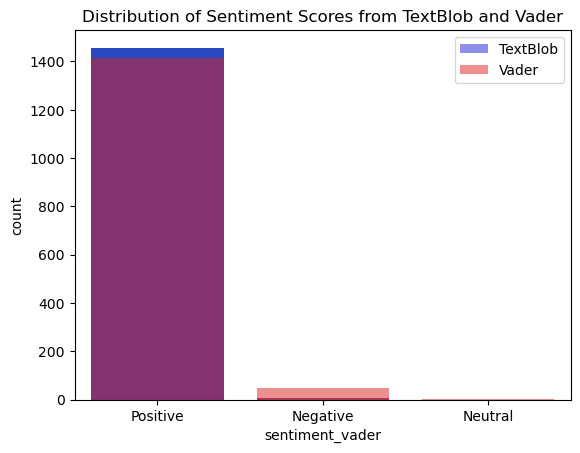

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot
sns.countplot(data=df, x='get_sentiment')


sns.countplot(x="sentiment_textblob", data=df, label="TextBlob", color='blue', alpha=0.5)
sns.countplot(x="sentiment_vader", data=df, label="Vader", color='red', alpha=0.5)
plt.legend()
plt.title('Distribution of Sentiment Scores from TextBlob and Vader')
plt.show()

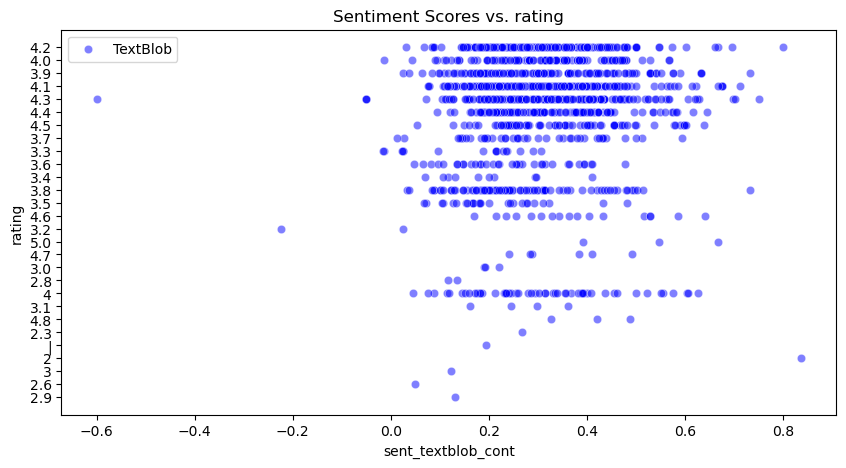

In [14]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="sent_textblob_cont", y="rating", data=df, label="TextBlob", color='blue', alpha=0.5)
# sns.scatterplot(x="followers", y="sent_vader_cont", data=df, label="Vader", color='red', alpha=0.5)
# plt.xscale('log')  # Log scale for better visualization if followers vary widely
plt.legend()
plt.title('Sentiment Scores vs. rating')
plt.show()

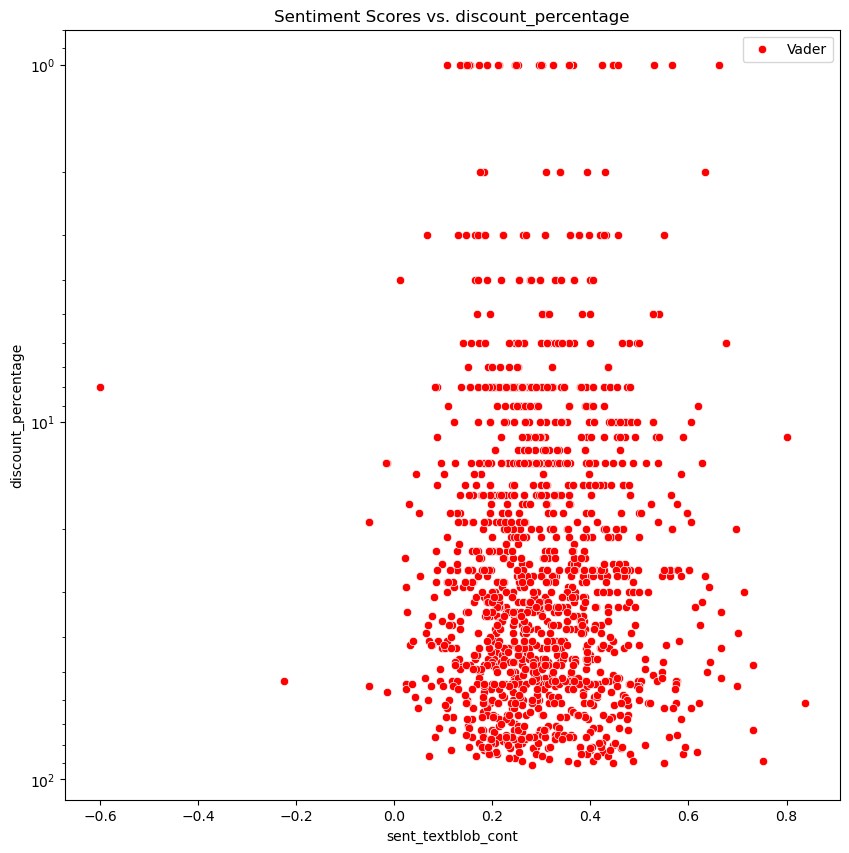

In [15]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x="sent_textblob_cont", y="discount_percentage", data=df, label="Vader", color='red', alpha=1)
plt.yscale('log')
plt.legend()
plt.title('Sentiment Scores vs. discount_percentage')
plt.show()

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.manifold import TSNE

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda.transform(count_data)):
    topic_weights.append([w for i, w in enumerate(row_list)])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)
!pip install bokeh

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1448 samples in 0.001s...
[t-SNE] Computed neighbors for 1448 samples in 0.081s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1448
[t-SNE] Computed conditional probabilities for sample 1448 / 1448
[t-SNE] Mean sigma: 0.002273
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.884144
[t-SNE] KL divergence after 1000 iterations: 0.375950
  Using cached bokeh-3.1.1-py3-none-any.whl (8.3 MB)
  Using cached xyzservices-2023.5.0-py3-none-any.whl (56 kB)


In [17]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
# Plot the Topic Clusters using Bokeh
output_notebook()
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(number_topics), 
              width=900, height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)
plt.show()

Loading BokehJS ...

### Results

Amazon electronic product review's relation with rating, and what are the most mentioned topics in the review 

### Contribution